<div align="center">
  <h1><strong>EDM Challenge - Kelompok 4</strong></h1>
  <table style="margin-top: 50px; margin-bottom: 30px; width: 80%; text-align: center;">
    <tr>
      <th>Nama Anggota</th>
      <th>NIM</th>
    </tr>
    <tr>
      <td>Ahmad Fauzi</td>
      <td>1202220263</td>
    </tr>
    <tr>
      <td>Alvaro Cleosanda</td>
      <td>1202220181</td>
    </tr>
    <tr>
      <td>Vilson</td>
      <td>1202220199</td>
    </tr>
  </table>
</div>

<br>

---


# 🎯 **Sentinel: Deteksi Komentar Bullying di Media Sosial**

<div align="center">
  <img src="artificial (2000 x 800 piksel).png" alt="Sentinel" style="max-width: 800px;">
</div>

Sentinel adalah project dari kelompok kami untuk menghasilkan sebuah model analisis sentimen yang dirancang untuk mendeteksi komentar di media sosial, khususnya untuk mengidentifikasi apakah sebuah komentar termasuk dalam kategori bullying atau non-bullying. Proyek ini menggabungkan model machine learning dengan implementasi dalam bentuk website berbasis Streamlit dan notebook, bertujuan untuk mengurangi cyberbullying di sosial media.
Model machine learning yang diusulkan akan dikembangkan untuk mengidentifikasi dan mengklasifikasikan komentar di media sosial ke dalam dua kategori: **Bullying** dan **Non-Bullying**. Dengan menggunakan dataset yang telah diberi label dari komentar TikTok, model ini akan dilatih untuk mengenali pola, bahasa, dan konteks yang membedakan antara komentar yang merugikan dan yang tidak.

## 📚 **Problem Background**
Dengan pesatnya perkembangan platform media sosial seperti TikTok, komentar bullying menjadi masalah utama yang mempengaruhi kesehatan mental pengguna dan pengalaman mereka di platform. Mengidentifikasi komentar bullying secara manual tidak efektif karena volume komentar yang tinggi dan keragaman bahasa serta konteks. Media sosial memungkinkan pengguna untuk meninggalkan komentar yang bisa berisi pujian hingga kritik merugikan. Bahasa ambigu dan sarkasme sering digunakan dalam komentar bullying, sehingga diperlukan sistem otomatis yang dapat mendeteksi dan mengklasifikasikan komentar bullying secara akurat.

## 🚀 **Objectives of the Solution**
Tujuan dari solusi yang diusulkan, yaitu penerapan model machine learning untuk deteksi komentar bullying dari dataset komentar di TikTok, adalah sebagai berikut:

1. **Deteksi Otomatis**: Mengidentifikasi komentar bullying secara otomatis untuk mengurangi dampak negatif pada kesehatan mental pengguna dan menciptakan lingkungan online yang lebih aman. 🔍

2. **Deteksi yang Lebih Akurat**: Mengembangkan model yang dapat membedakan komentar bullying dari komentar non-bullying dengan akurat, menggunakan teknik machine learning dan analisis teks yang canggih. 🎯

3. **Peningkatan Kesadaran**: Meningkatkan kesadaran tentang dampak bullying dan pentingnya moderasi konten yang efektif, untuk mengurangi cyberbullying di media sosial. 🌟


## 📊 **Overview Dataset**
Dataset yang digunakan dalam proyek ini diperoleh melalui proses scraping data komentar di TikTok, menggunakan script dari repository GitHub [cubernetes/TikTokCommentScraper](https://github.com/cubernetes/TikTokCommentScraper). File utama yang digunakan dalam proyek ini adalah `train.csv`, yang berisi data komentar TikTok beserta label klasifikasinya. Berikut adalah deskripsi dari kolom-kolom yang ada dalam dataset tersebut:

- **Text**: Kolom ini berisi teks dari komentar yang diambil dari video TikTok. Setiap entri adalah komentar unik dari pengguna TikTok.
- **Label**: Kolom ini berisi label untuk setiap komentar yang menunjukkan apakah komentar tersebut termasuk dalam kategori **Bullying** atau **Non-Bullying**. Label ini berisi nilai biner:
  - **0**: Non-Bullying, menunjukkan bahwa komentar tersebut tidak mengandung bullying.
  - **1**: Bullying, menunjukkan bahwa komentar tersebut mengandung bullying.

<br>

---

## 📊 **Import Libraries**
Pada bagian ini, berbagai library diimpor untuk mendukung proses pemrosesan data, pengembangan, dan evaluasi model machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from indoNLP.preprocessing import *
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import joblib


## 📂 **Load Data**

Pada bagian ini merupakan proses memuat dataset yang telah dikumpulkan untuk analisis. Dataset ini berisi komentar yang di-scrape dari TikTok dan disimpan dalam file CSV. Berikut adalah langkah-langkah untuk memuat dan menampilkan data:

In [3]:
df = pd.read_csv('Data Scrapping - EDM Challenge Kelompok 4 - Sheet1.csv')

In [4]:
df

,Text,Label
0,cipung baju zumba cu bgt🤏🏼,0
1,Kenapa dia kalo di luar negeri suka pake baju ...,0
2,bener bener mirip olga,0
3,cipung ketemu yuki kato,0
4,cipung era baju zumba is back😂,0
...,...,...
10521,G itu warna kulit gelap,1
10522,yapping boss level 999,1
10523,bagusnya kulit lu mana??,1
10524,dih,1


# 🔍 **Exploratory Data Analysis**

- **Class Label Distribution** 

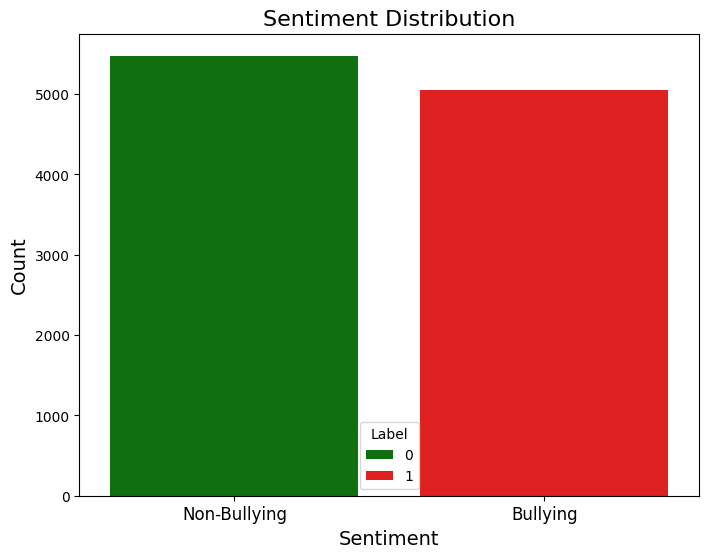

In [5]:
# Count the occurrences of each sentiment label
sentiment_counts = df['Label'].value_counts().reset_index()
sentiment_counts.columns = ['Label', 'Count']

# Plot the bar plot with Seaborn, following the suggested method to avoid warnings
plt.figure(figsize=(8, 6))
sns.barplot(x='Label', y='Count', data=sentiment_counts, hue='Label', dodge=False, palette=['green', 'red'])
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Non-Bullying', 'Bullying'], fontsize=12)
plt.show()

  Dari grafik distribusi sentimen, terlihat bahwa dataset memiliki **jumlah data yang hampir seimbang** antara label **Non-Bullying** dan **Bullying**. Meskipun ada sedikit lebih banyak data Non-Bullying, perbedaan ini tidak signifikan dan tidak menimbulkan kekhawatiran tentang bias pada model. (Tidak perlu adanya metode sampling untuk menyeimbangkan data)

- **Word Count Distribution**

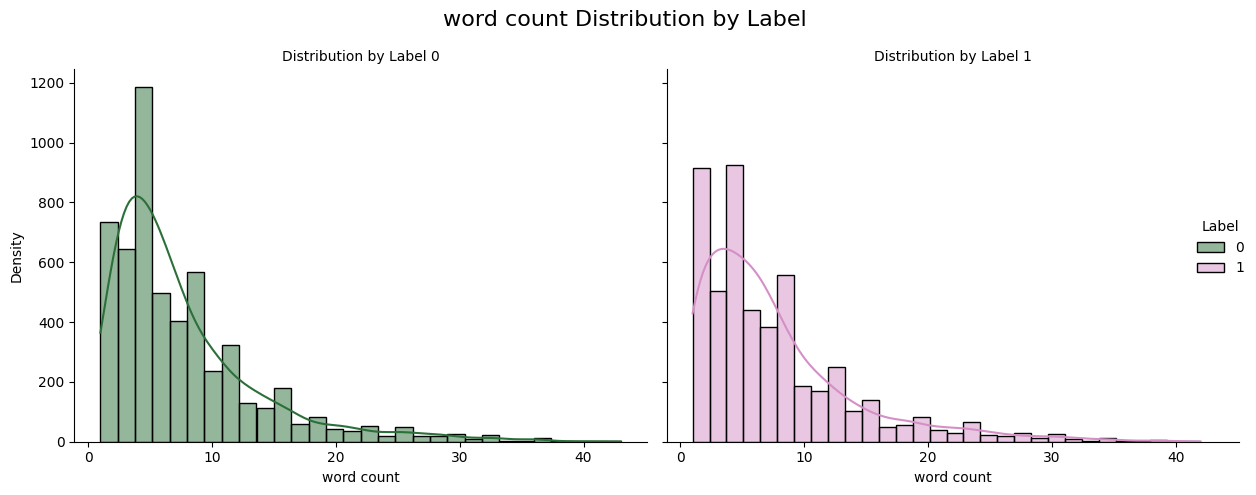

In [6]:
# Create a new column for the word count of each text
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

# Create a FacetGrid to visualize the distribution of word count by label (Non-Bullying and Bullying)
g = sns.FacetGrid(df, col='Label', hue='Label', palette='cubehelix', height=5, aspect=1.2)
g.map(sns.histplot, 'word_count', kde=True, bins=30)

# Add titles and labels
g.set_axis_labels("word count", "Density")
g.set_titles("Distribution by Label {col_name}")
g.fig.suptitle("word count Distribution by Label", fontsize=16)
g.add_legend()
plt.tight_layout()
plt.show()

Dari visualisasi di atas, dapat dilihat bahwa distribusi panjang teks untuk label 0 (positif) dan label 1 (bullying) memiliki pola yang serupa, dengan sebagian besar teks memiliki banyak kata sekitar 10. Kedua label memiliki distribusi jumlah kata yang kurang lebih sama.

Distribusi panjang teks tampaknya tidak menunjukkan adanya masalah yang signifikan, sehingga tidak diperlukan tindakan lebih lanjut terkait preprocessing data berdasarkan panjang teks.

- **Outlier Handling (Box Plot IQR Method)**

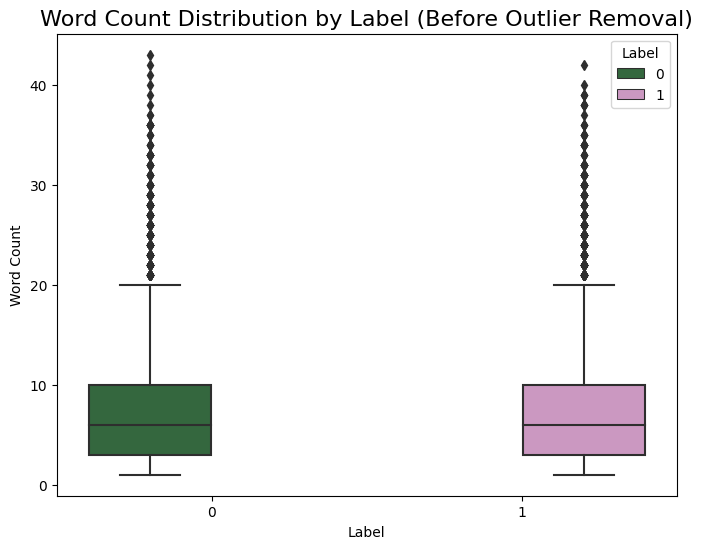

In [7]:
# Visualize the initial boxplot before outlier removal using word count instead of text length
plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y='word_count', data=df, palette='cubehelix', hue='Label')
plt.title('Word Count Distribution by Label (Before Outlier Removal)', fontsize=16)
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

*Boxplot* menunjukkan bahwa panjang teks untuk kedua label memiliki distribusi yang serupa, dengan rentang interkuartil (IQR) yang hampir sama.
Meskipun terdapat beberapa *outlier* (teks dengan panjang yang sangat tinggi), hal ini wajar terjadi pada data teks. *Outlier* ini bisa merepresentasikan teks yang sangat informatif atau mungkin teks yang mengandung kata-kata berulang atau tidak relevan.

---

# 🧹 **Data Preprocessing**
Pada bagian ini merupakan preprocessing pada data untuk memastikan kualitas data yang optimal sebelum pelatihan model.

- **Handling duplicates**

Menghapus duplikasi dalam data adalah langkah krusial untuk memastikan bahwa model yang dilatih tidak bias dan akurat. Berikut adalah langkah-langkah untuk menangani duplikasi dalam dataset:

In [8]:
df.duplicated(subset=['Text']).sum()

234

In [9]:
df.drop_duplicates(inplace=True, subset=['Text'])

- **Handling Emojis**

Pada bagian ini, untuk menangani emoji dalam teks komentar. Emoji sering kali membawa makna tambahan yang perlu diubah menjadi format yang dapat diproses oleh model. Untuk itu, kita akan mengonversi emoji menjadi kata-kata yang setara.

In [10]:
#convert emoji to word

def convert_emoji(text) : 
    return emoji_to_words(text, lang='id', use_alias=False, delimiter=(' ', ' '))

df['Text'] = df['Text'].apply(convert_emoji)


In [11]:
df

,Text,Label,word_count
0,cipung baju zumba cu bgt tangan_menjepit_warna...,0,5
1,Kenapa dia kalo di luar negeri suka pake baju ...,0,10
2,bener bener mirip olga,0,4
3,cipung ketemu yuki kato,0,4
4,cipung era baju zumba is back wajah_gembira_be...,0,6
...,...,...,...
10519,cpek bnget dengerin dia ngmong berasa lagi lar...,1,10
10520,maneh bisa kan ngomong bahasa indonesia? riweuh,1,7
10521,G itu warna kulit gelap,1,5
10522,yapping boss level 999,1,4


- **Cleaning Text by Removing Unecessary Elements**

Pada bagian ini, akan dibersihkan teks komentar dari elemen-elemen yang tidak perlu untuk meningkatkan kualitas data sebelum analisis lebih lanjut. Proses ini meliputi penghapusan simbol, emoji, URL, dan elemen lain yang dapat mengganggu analisis.

In [12]:
#Bersihin data ( remove simbol, emoji etc)
def clean_text(text):
    text = re.sub(r'http\S+', '', text) #remove url
    text = re.sub(r'@\S+', '', text) #remove mention
    text = re.sub(r'#\S+', '', text) #remove hashtag
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) #keep only alphanumeric
    text = re.sub(r'\s+', ' ', text).strip() #remove extra spaces
    text = re.sub(r'(.)\1+', r'\1', text) #remove duplicate characters

    return text

In [13]:
df['Text'] = df['Text'].apply(clean_text)
df['Text'] = df['Text'].str.lower()

- **Replacing Slang Words in The Text Data**

Langkah ini menggantikan kata-kata slang dalam teks komentar dengan bentuk yang lebih formal atau standar. Penggunaan bahasa slang dapat mempengaruhi pemahaman model, sehingga mengganti dengan istilah yang lebih umum membantu meningkatkan akurasi analisis.

In [14]:
df['text_cleaned'] = df['Text'].apply(lambda x: replace_slang(x))

- **Remove Stop Words**

Tahap ini menghapus kata-kata yang tidak memiliki makna signifikan dalam analisis teks, seperti kata penghubung dan kata umum lainnya. Menghilangkan kata-kata tersebut membantu fokus pada kata-kata kunci yang lebih relevan dan meningkatkan kualitas pemodelan.

In [15]:
stop_words = StopWordRemoverFactory().get_stop_words()

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['text_cleaned'] = df['text_cleaned'].apply(lambda x: stopword(x))


- **Tokenization and Stemming**

1. Tokenisasi Teks

Tokenisasi membagi teks menjadi unit-unit yang lebih kecil, yaitu kata-kata individual. Ini membantu dalam analisis teks dengan memungkinkan pemrosesan setiap kata secara terpisah.

In [16]:
#tokenize text_cleaned
def tokenize_text(text):
    return text.split()

df['text_cleaned'] = df['text_cleaned'].apply(tokenize_text)

2. Stemming Data

Stemming adalah proses mengubah kata-kata menjadi bentuk dasarnya untuk menyederhanakan analisis teks. Dengan melakukan stemming, variasi kata yang memiliki makna yang sama akan dikurangi menjadi bentuk dasar yang konsisten. Langkah ini penting untuk mengurangi kompleksitas data dan meningkatkan akurasi model.

In [17]:
#stemming data

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

df['text_cleaned'] = df['text_cleaned'].apply(lambda x: stemming(x))

In [18]:
df.sample(10)

,Text,Label,word_count,text_cleaned
5645,ini yang di youtube bukansi,0,5,youtube bukansi
8997,lagi sulit sulitnya cari kerja dia dapat waris...,1,9,sulit sulit cari waris abah tertawa bahak bahak
8486,koleksi mainan tuh dirumah bukan di kantor waj...,0,8,koleksi main tuh rumah kantor wajah senyum leb...
8266,biasa paktor materi,1,3,paktor materi
9797,boneka gibran main boneka,1,4,boneka gibran main boneka
7960,komen nya kok gini wajah cemberut wajah cemberut,0,5,komen wajah cemberut wajah cemberut
2202,ngapain nangepin komen ginian penting banget,1,6,kapai nangepin komen banget
8230,bayangin dia lagi diatas wajah merenung wajah ...,1,4,bayang atas wajah renung wajah renung
4798,waduh,0,1,
3786,tp ada yg cepo neng wajah menjulurkan lidah da...,0,6,cepo neng wajah julur lidah mejam wajah julur ...


- **Looking at The Count of Words Distribution After Preprocessing the Text**

Setelah pemrosesan teks, penting untuk menganalisis distribusi jumlah kata dalam data yang telah dibersihkan. Analisis ini membantu untuk memahami seberapa banyak informasi yang tersisa setelah teks dibersihkan dan diolah. Langkah pertama adalah menghitung jumlah kata dalam setiap entri teks yang telah dibersihkan serta visuaisasinya.

In [19]:
df['cleaned word count'] = df['text_cleaned'].apply(lambda x: len(x.split()))

<AxesSubplot: xlabel='cleaned word count', ylabel='Count'>

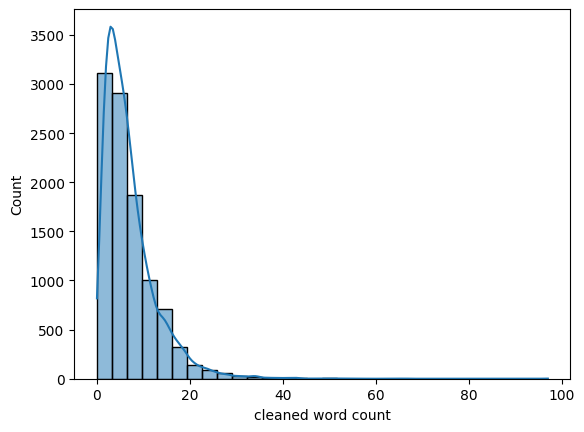

In [20]:
sns.histplot(df['cleaned word count'], kde=True, bins=30)

Selanjutnya, outlier dalam jumlah kata dibersihkan dideteksi menggunakan metode IQR (Interquartile Range). Outlier dapat menunjukkan entri data yang tidak biasa atau kesalahan dalam pemrosesan.

In [21]:
#detect outlier in cleaned word count

Q1 = df['cleaned word count'].quantile(0.25)
Q3 = df['cleaned word count'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['cleaned word count'] < (Q1 - 1.5 * IQR)) | (df['cleaned word count'] > (Q3 + 1.5 * IQR))]
outliers['cleaned word count'].describe()

count    460.000000
mean      24.732609
std        7.558070
min       19.000000
25%       20.000000
50%       22.000000
75%       27.000000
max       97.000000
Name: cleaned word count, dtype: float64

In [22]:
df['cleaned word count'].describe()

count    10292.000000
mean         7.006316
std          5.786307
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         97.000000
Name: cleaned word count, dtype: float64

Dengan menggunakan metode IQR, dapat terlihat bahwa teks dengan lebih dari 19 kata dianggap sebagai outlier. Namun, kami tidak akan menghapusnya karena hal tersebut akan mengurangi variasi data. Sebagai gantinya, kami akan menghapus data dengan jumlah kata lebih dari 25 untuk menghilangkan outlier ekstrem dan menormalkan dataset.

In [23]:
print('text with > 25 word',df[df['cleaned word count'] >25].shape)
print('text with 0 word',df[df['cleaned word count'] == 0].shape)


text with > 25 word (137, 5)
text with 0 word (66, 5)


- **Removing Sentence That Has 0 Word and More Than 25 Words**

Langkah berikutnya adalah menghapus kalimat yang memiliki jumlah kata nol atau lebih dari 25 kata. Hal ini dilakukan untuk menghilangkan entri yang tidak relevan dan memastikan kualitas dataset. Setelah penghapusan, distribusi jumlah kata pada dataset diperiksa kembali untuk memastikan bahwa data telah dinormalisasi.

In [24]:
df = df[(df['cleaned word count'] > 0) & (df['cleaned word count'] <= 25)]

<AxesSubplot: xlabel='cleaned word count', ylabel='Count'>

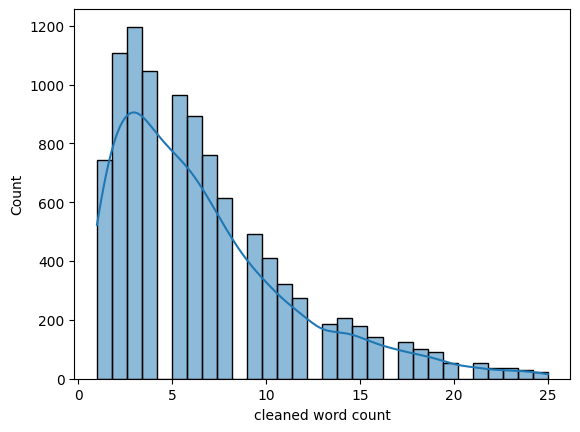

In [25]:
sns.histplot(df['cleaned word count'], kde=True, bins=30)

# 🔍 **Create 3 Supervised Learning Models**

Langkah ini melibatkan pembuatan dan pelatihan model machine learning untuk mengklasifikasikan komentar sebagai bullying atau non-bullying. Berikut merupakan 3 model Supervised Learning yang akan kita gunakan:
1. Support Vector Machine (SVM)
2. Naive Bayes (Multinomial Naive Bayes)
3. Logistic Regression

- **Splitting Dataset Into Training and Testing Data (80:20)**

Langkah ini bertujuan untuk membagi dataset menjadi dua bagian: satu untuk melatih model dan satu lagi untuk menguji kinerjanya. Dataset dibagi menjadi data pelatihan (`X_train`, `y_train`) yang digunakan untuk melatih model, dan data pengujian (`X_test`, `y_test`) untuk mengevaluasi kinerja model setelah pelatihan. Pembagian ini memastikan bahwa model dapat diuji pada data yang belum pernah dilihat sebelumnya, memberikan indikasi yang lebih akurat tentang kinerjanya di dunia nyata.


In [26]:
X = df['text_cleaned']
y = df['Label']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

- **Feature Extraction for Supervised Learning Models (TF-IDF Vectorizer)**

Pada tahap ini, fitur dari data teks diubah menjadi format numerik yang dapat digunakan oleh model machine learning. Proses ini dilakukan dengan menggunakan `TfidfVectorizer`, yang mengonversi teks menjadi representasi TF-IDF (Term Frequency-Inverse Document Frequency). Ini membantu dalam menilai pentingnya kata-kata dalam dokumen relatif terhadap seluruh dataset.

In [27]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

- **Training and Evaluating Models**

3 Model machine learning dilatih menggunakan data pelatihan dan dievaluasi menggunakan data pengujian. Model yang diterapkan adalah Logistic Regression, SVM, dan Naive Bayes. Evaluasi dilakukan dengan menghitung akurasi, classification report, ROC-AUC score, dan confusion matrix dari model untuk menilai kinerjanya.

In [28]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Bullying', 'Bullying'],
                yticklabels=['Non-Bullying', 'Bullying'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

Logistic Regression Accuracy Score Training -> 87.44%
Logistic Regression Accuracy Score Testing -> 80.28%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1063
           1       0.80      0.77      0.79       955

    accuracy                           0.80      2018
   macro avg       0.80      0.80      0.80      2018
weighted avg       0.80      0.80      0.80      2018

Logistic Regression ROC AUC Score -> 0.8012

Logistic Regression Confusion Matrix:


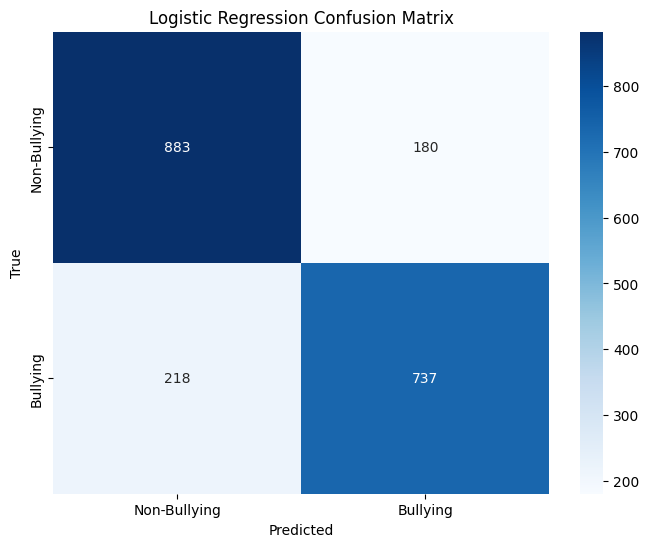

--------------------------------------------------
SVM Accuracy Score Training -> 95.99%
SVM Accuracy Score Testing -> 80.48%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1063
           1       0.80      0.78      0.79       955

    accuracy                           0.80      2018
   macro avg       0.80      0.80      0.80      2018
weighted avg       0.80      0.80      0.80      2018

SVM ROC AUC Score -> 0.8034

SVM Confusion Matrix:


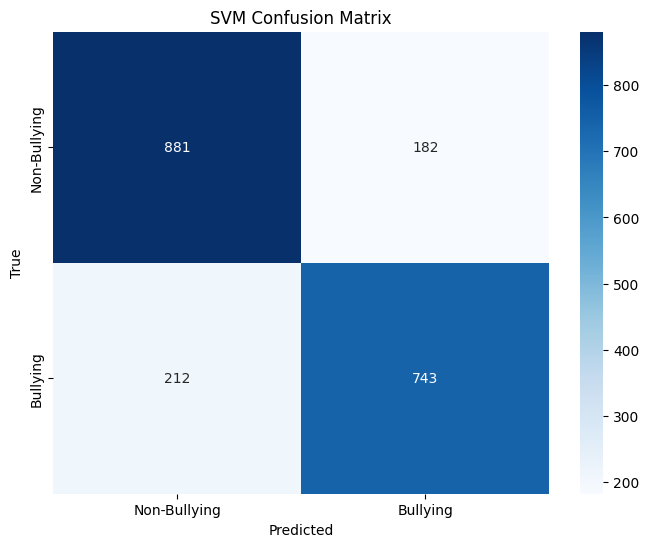

--------------------------------------------------
Naive Bayes Accuracy Score Training -> 88.11%
Naive Bayes Accuracy Score Testing -> 79.19%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81      1063
           1       0.83      0.71      0.76       955

    accuracy                           0.79      2018
   macro avg       0.80      0.79      0.79      2018
weighted avg       0.80      0.79      0.79      2018

Naive Bayes ROC AUC Score -> 0.7876

Naive Bayes Confusion Matrix:


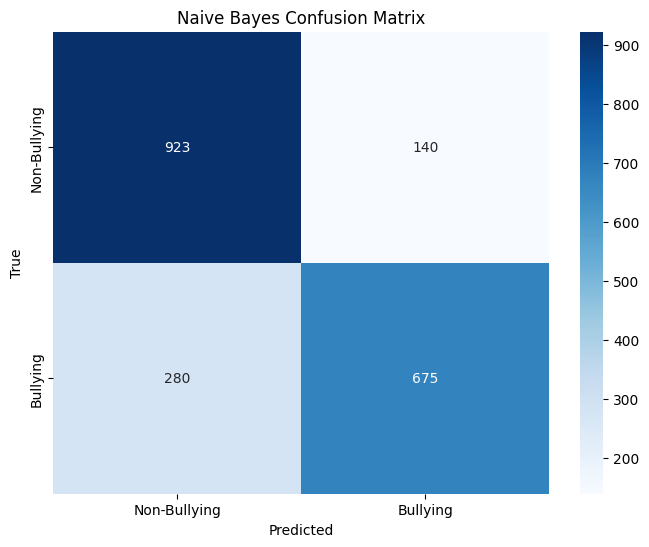

--------------------------------------------------


In [29]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, predictions_train) * 100
    test_accuracy = accuracy_score(y_test, predictions_test) * 100
    
    print(f"{model_name} Accuracy Score Training -> {train_accuracy:.2f}%")
    print(f"{model_name} Accuracy Score Testing -> {test_accuracy:.2f}%")
    
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, predictions_test))

    roc_auc = roc_auc_score(y_test, predictions_test)
    print(f"{model_name} ROC AUC Score -> {roc_auc:.4f}\n")
    
    print(f"{model_name} Confusion Matrix:")
    plot_confusion_matrix(y_test, predictions_test, model_name)
    
    print('-' * 50) 
    return model

# Existing models
logistic_regression = train_and_evaluate_model(LogisticRegression(), 'Logistic Regression')
svm = train_and_evaluate_model(SVC(), 'SVM')
naive_bayes = train_and_evaluate_model(MultinomialNB(), 'Naive Bayes')

# ⚙️ **Hyperparameter Tuning Supervised Models**

Pada langkah ini, proses hyperparameter tuning dilakukan untuk meningkatkan performa model. Grid Search digunakan untuk mencari kombinasi hyperparameter terbaik untuk model Logistic Regression, SVM, dan Naive Bayes. Grid Search mencoba berbagai kombinasi parameter dan memilih yang memberikan skor terbaik berdasarkan metrik evaluasi yang ditentukan, yaitu ROC-AUC score.

- **Logistic Regression**

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, n_jobs=-1, scoring='roc_auc', verbose= 1)
grid_search_logistic.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_logistic.best_params_}")
print(f"Best Score: {grid_search_logistic.best_score_}")

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8635116594693224


c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packa

Best Logistic Regression (GridSearch) Accuracy Score Training -> 94.10%
Best Logistic Regression (GridSearch) Accuracy Score Testing -> 79.68%
Best Logistic Regression (GridSearch) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1063
           1       0.78      0.79      0.79       955

    accuracy                           0.80      2018
   macro avg       0.80      0.80      0.80      2018
weighted avg       0.80      0.80      0.80      2018

Best Logistic Regression (GridSearch) ROC AUC Score -> 0.7963

Best Logistic Regression (GridSearch) Confusion Matrix:


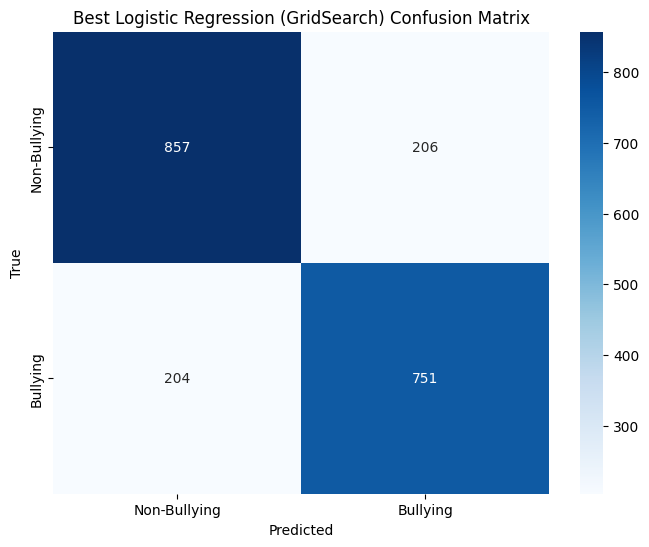

--------------------------------------------------


In [31]:
best_logistic_regression = grid_search_logistic.best_estimator_
best_logistic_regression = train_and_evaluate_model(best_logistic_regression, 'Best Logistic Regression (GridSearch)')

- **SVM**

In [32]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Degree only relevant for 'poly' kernel
    'gamma': ['scale', 'auto'],  # Gamma parameter for 'rbf', 'poly', and 'sigmoid' kernels
    'coef0': [0.0, 0.1, 0.5],  # coef0 parameter for 'poly' and 'sigmoid' kernels
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1, scoring='roc_auc', verbose=1)
grid_search_svm.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Best Score: {grid_search_svm.best_score_}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'C': 1, 'coef0': 0.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best Score: 0.8630127857583997


Best SVM (GridSearch) Accuracy Score Training -> 97.48%
Best SVM (GridSearch) Accuracy Score Testing -> 80.57%
Best SVM (GridSearch) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1063
           1       0.80      0.79      0.79       955

    accuracy                           0.81      2018
   macro avg       0.81      0.80      0.81      2018
weighted avg       0.81      0.81      0.81      2018

Best SVM (GridSearch) ROC AUC Score -> 0.8050

Best SVM (GridSearch) Confusion Matrix:


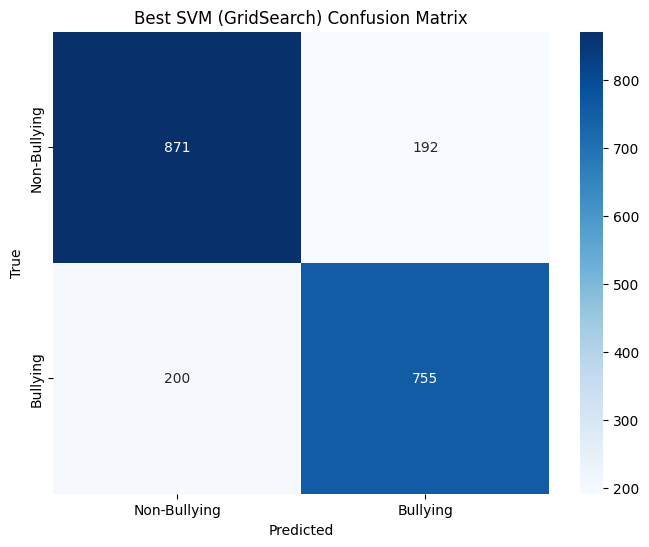

--------------------------------------------------


In [33]:
best_svm = grid_search_svm.best_estimator_
best_svm = train_and_evaluate_model(best_svm, 'Best SVM (GridSearch)')

- **Naive Bayes**

In [34]:
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, n_jobs=-1, scoring='roc_auc', verbose=1)
grid_search_nb.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_nb.best_params_}")
print(f"Best Score: {grid_search_nb.best_score_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'alpha': 0.5}
Best Score: 0.8713911936272952


Best Multinomial Naive Bayes Accuracy Score Training -> 89.33%
Best Multinomial Naive Bayes Accuracy Score Testing -> 79.29%
Best Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1063
           1       0.82      0.72      0.77       955

    accuracy                           0.79      2018
   macro avg       0.80      0.79      0.79      2018
weighted avg       0.80      0.79      0.79      2018

Best Multinomial Naive Bayes ROC AUC Score -> 0.7893

Best Multinomial Naive Bayes Confusion Matrix:


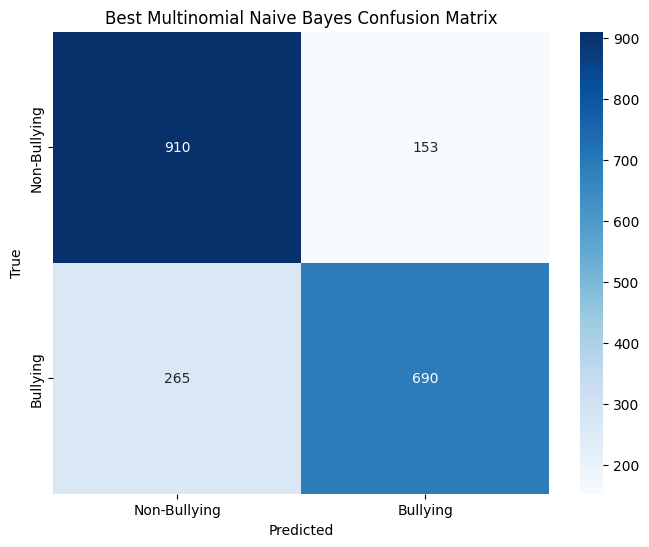

--------------------------------------------------


In [35]:
best_multinomial_nb = grid_search_nb.best_estimator_
best_multinomial_nb = train_and_evaluate_model(best_multinomial_nb, 'Best Multinomial Naive Bayes')

After doing hyperparameter tuning, we see that the accuracy of both models changes slightly. Logistic regression decreased, while SVM increased a little bit.

- **Testing Supervised Models**

In [37]:
def predict_hate_speech(text, model, model_name):
    basetext = text
    text = convert_emoji(text)
    text = clean_text(text)
    text = text.lower()
    text = replace_slang(text)
    text = stopword(text)
    text = tokenize_text(text)
    text = stemming(text)
    text = vectorizer.transform([text])
    
    prediction = model.predict(text)
    result = 'Bullying' if prediction == 1 else 'Non Bullying'
    return f'{model_name} Prediction: {result}'

text = input('Enter text: ')
print("Prediksi yang benar adalah Bullying!")

print(predict_hate_speech(text, logistic_regression, 'Logistic Regression'))
print(predict_hate_speech(text, svm, 'SVM'))
print(predict_hate_speech(text, naive_bayes, 'Naive Bayes'))


Prediksi yang benar adalah Bullying!
Logistic Regression Prediction: Bullying
SVM Prediction: Bullying
Naive Bayes Prediction: Bullying


# 🤖 **Create LSTM Model (Deep Learning)**

Model LSTM (Long Short-Term Memory) digunakan untuk mendeteksi komentar bullying dengan memanfaatkan embedding kata dari FastText. Berikut adalah langkah-langkah yang dilakukan:

1. **Mengambil Word Embeddings**: 
   Menggunakan model FastText untuk mendapatkan representasi vektor dari setiap kata dalam komentar.

2. **Padding Embeddings**: 
   Memastikan setiap embedding teks memiliki panjang yang sama dengan melakukan padding pada embeddings.

3. **Membangun Model LSTM**:
   Membangun model LSTM dengan dua lapisan LSTM dan dropout untuk mengurangi overfitting. Model ini dirancang untuk klasifikasi biner.

4. **Melatih dan Mengevaluasi Model**:
   Melatih model dengan data pelatihan dan mengevaluasinya menggunakan data pengujian. Evaluasi dilakukan dengan menghitung akurasi, classification report, ROC-AUC score, dan confusion matrix.

5. **Prediksi dengan Input Pengguna**:
   Menggunakan model LSTM terlatih untuk memprediksi apakah teks yang diberikan adalah komentar bullying atau bukan, dan menampilkan hasilnya beserta confidence score.

In [39]:
df

,Text,Label,word_count,text_cleaned,cleaned word count
0,cipung baju zumba cu bgt tangan menjepit warna...,0,5,cipung baju zumba cu banget tangan jepit warna...,10
1,kenapa dia kalo di luar negeri suka pake baju ...,0,10,kalo negeri suka pakai baju zumba wajah menang...,9
2,bener bener mirip olga,0,4,olga,1
3,cipung ketemu yuki kato,0,4,cipung ketemu yuk kato,4
4,cipung era baju zumba is back wajah gembira be...,0,6,cipung era baju zumba is back wajah gembira ur...,10
...,...,...,...,...,...
10519,cpek bnget dengerin dia ngmong berasa lagi lar...,1,10,cpek banget dengar ngmong asa lari kliling ind...,8
10520,maneh bisa kan ngomong bahasa indonesia riweuh,1,7,maneh omong bahasa indonesia riweuh,5
10521,g itu warna kulit gelap,1,5,warna kulit gelap,3
10522,yaping bos level 9,1,4,yaping bos level 9,4


In [45]:
import fasttext
sentence = df['text_cleaned'].apply(lambda x: x.split())

# Load the FastText model
ft = fasttext.load_model('cc.id.300.bin')

# Function to get the word embedding
def get_word_embedding(text):
    text_embedding = []
    for word in text:
        try:
            text_embedding.append(ft.get_word_vector(word))
        except:
            pass
    return text_embedding

sentence_embedding = sentence.apply(lambda x: get_word_embedding(x))

# Pad the sentence embedding
max_len = 50
padded_embeddings = pad_sequences(sentence_embedding, maxlen=max_len, dtype='float32', padding='post')

# For binary classification, use the labels directly
y = df['Label'].values

# Train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(padded_embeddings, y, test_size=0.2, random_state=42)

Epoch 1/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.5700 - loss: 0.6690 - val_accuracy: 0.6881 - val_loss: 0.5872
Epoch 2/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6933 - loss: 0.6076 - val_accuracy: 0.7092 - val_loss: 0.5820
Epoch 3/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7284 - loss: 0.5722 - val_accuracy: 0.7079 - val_loss: 0.5717
Epoch 4/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.7310 - loss: 0.5595 - val_accuracy: 0.6931 - val_loss: 0.5842
Epoch 5/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7312 - loss: 0.5503 - val_accuracy: 0.7203 - val_loss: 0.5491
Epoch 6/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7406 - loss: 0.5371 - val_accuracy: 0.7166 - val_loss: 0.5460
Epoch 7/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7565 - loss: 0.5225 - val_accuracy: 0.7166 - val_loss: 0.5498
Epoch 8/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7653 - loss: 0.5112 - val_acc

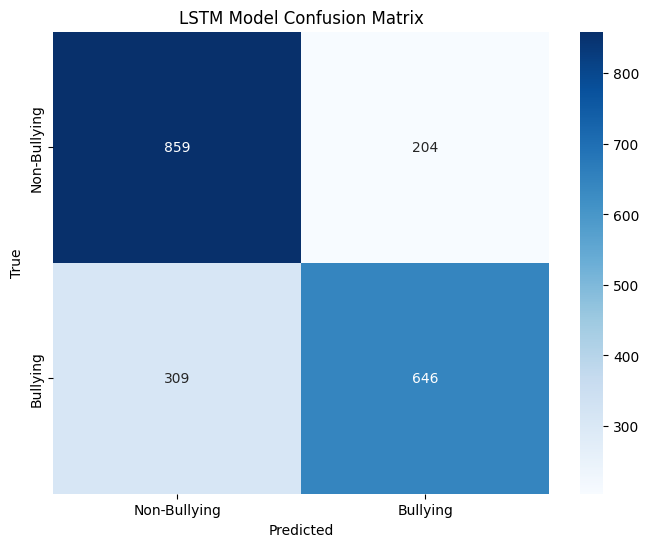

In [46]:

# Build the LSTM model for binary classification
lstm = Sequential()
lstm.add(LSTM(units=128, return_sequences=True, input_shape=(max_len, 300)))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=64))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1, activation='sigmoid'))  # Single output for binary classification

# Compile the model
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions_test = model.predict(X_test)
    predictions_test_labels = (predictions_test > 0.5).astype(int).flatten()
    
    test_accuracy = accuracy_score(y_test, predictions_test_labels) * 100
    print(f"Test Accuracy Score -> {test_accuracy:.2f}%")
    
    print("LSTM Model Classification Report:")
    print(classification_report(y_test, predictions_test_labels))

    roc_auc = roc_auc_score(y_test, predictions_test)
    print(f"LSTM Model ROC AUC Score -> {roc_auc:.4f}\n")
    
    print("LSTM Model Confusion Matrix:")
    plot_confusion_matrix(y_test, predictions_test_labels, 'LSTM Model')

evaluate_model(lstm, X_test, y_test)

- **Testing LSTM Models**

In [47]:
#test model on user input
def predict_hate_speech(text):
    basetext = text
    text = convert_emoji(text)
    text = clean_text(text)
    text = text.lower()
    text = replace_slang(text)
    text = stopword(text)
    text = tokenize_text(text)
    text = stemming(text)

    embedding = get_word_embedding(text)
    padded_embedding = pad_sequences([embedding], maxlen=50, dtype='float32', padding='post')
    prediction = lstm.predict(padded_embedding)

    #set output as 1 or 0 

    if prediction > 0.5:
        result = f'Teks ini teridentifikasi Bullying dengan confidence score {prediction[0][0]:.2f}'
    else:
        result = f'Teks ini teridentifikasi Non Bullying dengan confidence score {1 - prediction[0][0]:.2f}'
    print(f'Input : {basetext}')
    return result

text = input('Enter text: ')
print("Prediksi yang benar adalah Bullying!")

predict_hate_speech(text)

Prediksi yang benar adalah Bullying!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Input : kalo gamau lari gausah main bola goblok


'Teks ini teridentifikasi Bullying dengan confidence score 0.90'

- **Saving Models**

In [48]:
lstm.save('lstm_model.h5')
# Saving Models
joblib.dump(logistic_regression, 'logistic_regression_model.pkl')
joblib.dump(best_svm, 'svm_model.pkl')
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')

# Saving TF-IDF Vectorizer Model
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']